In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
df = pd.read_csv('../Data/STAGE 4 FINAL MERGED DATA/STAGE_4_MERGED_FINAL.csv')

In [3]:
df

,klasifikasi_perkara,penuntut_umum,hakim,jumlah_saksi,cleaned_barang_bukti,cleaned_dakwaan,terdakwa,total_pidana_penjara_bulan
0,Kebakaran Hutan,"Dewa Gde Ari Wicaksana, S,H.",RATIH KUSUMA WARDHANI,11,1 (satu) buah korek api kayu merk Three Durian...,"Bahwa Terdakwa I KETUT LANDUH, pada hari Selas...",I KETUT LANDUH,3.0
1,Penipuan,"FEBRI EKA PRADANA, S.H.",RATIH KUSUMA WARDHANI,4,1 (satu) lembar nota pembelian perhiasan kalun...,Bahwa terdakwa IDA BAGUS MADE DARMA WIGUNA ali...,IDA BAGUS MADE DARMA WIGUNA,24.0
2,Narkotika,"Gde Doni, S.H.",RATIH KUSUMA WARDHANI,2,1 (satu) buah plastik klip bening yang berisi ...,"Bahwa terdakwa I GEDE ARIADI alias BERNAD, pad...",I GEDE ARIADI alias BERNAD,14.0
3,Narkotika,"I Gde Doni Hendrawan, S.H.",RATIH KUSUMA WARDHANI,2,1 (satu) buah plastik klip bening yang berisi ...,"Bahwa terdakwa I GEDE ARIADI alias BERNAD, pad...",I GEDE ARIADI alias BERNAD,14.0
4,Penipuan,"Dewa Gde Ari Wicaksana, S,H.",ANAK AGUNG AYU DIAH INDRAWATI,5,1 (satu) unit sepeda motor merek Yamaha N-MAX ...,Bahwa Terdakwa I I KETUT JONI ADNYANA ADI PUTR...,I KETUT JONI ADNYANA ADI PUTRA,16.0
...,...,...,...,...,...,...,...,...
8577,Pencurian,"TRI NURANDI SINAGA, SH",SLAMET WIDODO,2,1 (satu) unit Handphone Samsung A52 Dikembalik...,"-Bahwa mereka, Terdakwa I SUPRIADI bin RATIM d...",ANWAR RURI BIN SYARIFUDIN USMAN,16.0
8578,Pencurian,"ARIF SURYANA , SH",DIAN ERDIANTO,2,"1 (satu) unit sepeda motor Yamaha NMAX, nopol ...",Perbuatan para terdakwa sebagaimana diatur dan...,BURHANNUDIN alias CULIK Bin M RUSDI,14.0
8579,Pencurian,"TRI NURANDI SINAGA, SH",DIAN ERDIANTO,2,"1 (satu) unit sepeda motor Yamaha NMAX, nopol ...",Perbuatan para terdakwa sebagaimana diatur dan...,BURHANNUDIN alias CULIK Bin M RUSDI,14.0
8580,Pencurian,"ARIF SURYANA , SH",DIAN ERDIANTO,2,"1 (satu) unit sepeda motor Yamaha NMAX, nopol ...",Perbuatan para terdakwa sebagaimana diatur dan...,DARWIS ABDUL SALAM alias AWIS Bin ALIMAN,14.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   klasifikasi_perkara         8582 non-null   object 
 1   penuntut_umum               8582 non-null   object 
 2   hakim                       8582 non-null   object 
 3   jumlah_saksi                8582 non-null   int64  
 4   cleaned_barang_bukti        8582 non-null   object 
 5   cleaned_dakwaan             8582 non-null   object 
 6   terdakwa                    8582 non-null   object 
 7   total_pidana_penjara_bulan  8582 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 536.5+ KB


In [5]:
jenis_klasifikasi_perkara = df['klasifikasi_perkara'].unique()
jumlah_klasifikasi_perkara = len(jenis_klasifikasi_perkara)
print(f"Jumlah Klasifikasi Perkara: {jumlah_klasifikasi_perkara}")

klasifikasi_perkara_values = df['klasifikasi_perkara'].value_counts()
print(klasifikasi_perkara_values)

Jumlah Klasifikasi Perkara: 54
klasifikasi_perkara
Pencurian                                                                                               2656
Narkotika                                                                                               2528
Kejahatan Perjudian                                                                                      571
Penggelapan                                                                                              553
Penipuan                                                                                                 323
Penganiayaan                                                                                             270
Lalu Lintas                                                                                              249
Lain-Lain                                                                                                247
Tindak Pidana Senjata Api atau Benda Tajam                                   

### Filter 5 Klasifikasi Perkara Terbanyak

In [6]:
klasifikasi_perkara_terbanyak = klasifikasi_perkara_values.head(5).index
df_filtered = df[df['klasifikasi_perkara'].isin(klasifikasi_perkara_terbanyak)]

In [7]:
df_filtered

,klasifikasi_perkara,penuntut_umum,hakim,jumlah_saksi,cleaned_barang_bukti,cleaned_dakwaan,terdakwa,total_pidana_penjara_bulan
1,Penipuan,"FEBRI EKA PRADANA, S.H.",RATIH KUSUMA WARDHANI,4,1 (satu) lembar nota pembelian perhiasan kalun...,Bahwa terdakwa IDA BAGUS MADE DARMA WIGUNA ali...,IDA BAGUS MADE DARMA WIGUNA,24.0
2,Narkotika,"Gde Doni, S.H.",RATIH KUSUMA WARDHANI,2,1 (satu) buah plastik klip bening yang berisi ...,"Bahwa terdakwa I GEDE ARIADI alias BERNAD, pad...",I GEDE ARIADI alias BERNAD,14.0
3,Narkotika,"I Gde Doni Hendrawan, S.H.",RATIH KUSUMA WARDHANI,2,1 (satu) buah plastik klip bening yang berisi ...,"Bahwa terdakwa I GEDE ARIADI alias BERNAD, pad...",I GEDE ARIADI alias BERNAD,14.0
4,Penipuan,"Dewa Gde Ari Wicaksana, S,H.",ANAK AGUNG AYU DIAH INDRAWATI,5,1 (satu) unit sepeda motor merek Yamaha N-MAX ...,Bahwa Terdakwa I I KETUT JONI ADNYANA ADI PUTR...,I KETUT JONI ADNYANA ADI PUTRA,16.0
5,Penipuan,"INDAH NOVITASARI, SH",ANAK AGUNG AYU DIAH INDRAWATI,5,1 (satu) unit sepeda motor merek Yamaha N-MAX ...,Bahwa Terdakwa I I KETUT JONI ADNYANA ADI PUTR...,I KETUT JONI ADNYANA ADI PUTRA,16.0
...,...,...,...,...,...,...,...,...
8577,Pencurian,"TRI NURANDI SINAGA, SH",SLAMET WIDODO,2,1 (satu) unit Handphone Samsung A52 Dikembalik...,"-Bahwa mereka, Terdakwa I SUPRIADI bin RATIM d...",ANWAR RURI BIN SYARIFUDIN USMAN,16.0
8578,Pencurian,"ARIF SURYANA , SH",DIAN ERDIANTO,2,"1 (satu) unit sepeda motor Yamaha NMAX, nopol ...",Perbuatan para terdakwa sebagaimana diatur dan...,BURHANNUDIN alias CULIK Bin M RUSDI,14.0
8579,Pencurian,"TRI NURANDI SINAGA, SH",DIAN ERDIANTO,2,"1 (satu) unit sepeda motor Yamaha NMAX, nopol ...",Perbuatan para terdakwa sebagaimana diatur dan...,BURHANNUDIN alias CULIK Bin M RUSDI,14.0
8580,Pencurian,"ARIF SURYANA , SH",DIAN ERDIANTO,2,"1 (satu) unit sepeda motor Yamaha NMAX, nopol ...",Perbuatan para terdakwa sebagaimana diatur dan...,DARWIS ABDUL SALAM alias AWIS Bin ALIMAN,14.0


### Split Data

In [8]:
def stratified_split(df: pd.DataFrame, split_size: float = 0.7) -> tuple[pd.DataFrame, pd.DataFrame]:
    unique_groups = df.groupby(["klasifikasi_perkara", "penuntut_umum", "hakim"]).apply(lambda x: x.index.tolist()).to_dict()
    
    print(unique_groups)
    train_idx, test_idx = [], []
    
    for indices in unique_groups.values():
        if len(indices) == 1:
            train_idx.extend(indices)
        else:
            train, test = train_test_split(indices, train_size=split_size, random_state=42)
            train_idx.extend(train)
            test_idx.extend(test)
    
    return df.loc[train_idx], df.loc[test_idx]

In [9]:
train_df, test_df = stratified_split(df_filtered)

{('Kejahatan Perjudian', 'ADISTI PRATAMA FEREVALDY,SH', 'Ayu Putri Cempaka Sari'): [2907], ('Kejahatan Perjudian', 'ADISTI PRATAMA FEREVALDY,SH', 'Luh Sasmita Dewi'): [2757], ('Kejahatan Perjudian', 'ADISTI PRATAMA FEREVALDY,SH', 'Putu Gde Novyartha'): [2802, 2804], ('Kejahatan Perjudian', 'AKHIRUDIN VAMI KEMALSA, SH', 'R.R. Diah Poernomojekti'): [3666], ('Kejahatan Perjudian', 'ANAK AGUNG ALIT RAI SUASTIKA,SH.', 'Erwin Harlond Palyama'): [1541, 1542], ('Kejahatan Perjudian', 'ANAK AGUNG GEDE HENDRAWAN, SH.', 'Ayu Putri Cempaka Sari'): [2908], ('Kejahatan Perjudian', "ANDRIAN AL MAS'UDI, SH.MH.", 'DIAN ERDIANTO'): [6748], ('Kejahatan Perjudian', "ANDRIAN AL MAS'UDI, SH.MH.", 'HARTO PANCONO'): [6332], ('Kejahatan Perjudian', "ANDRIAN AL MAS'UDI, SH.MH.", 'I WAYAN GEDE RUMEGA'): [6746], ('Kejahatan Perjudian', 'ANINDITYA EKA BINTARI, SH. MH', 'NI MADE OKTIMANDIANI, SH'): [2226], ('Kejahatan Perjudian', 'ANINDITYA EKA BINTARI, SH. MH', 'PUTU ENDRU SONATA, SH, MH.'): [2247], ('Kejahatan Pe

C:\Users\Kalea\AppData\Local\Temp\ipykernel_8020\2311629469.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_groups = df.groupby(["klasifikasi_perkara", "penuntut_umum", "hakim"]).apply(lambda x: x.index.tolist()).to_dict()


In [10]:
jenis_klasifikasi_perkara = train_df['klasifikasi_perkara'].unique()
jumlah_klasifikasi_perkara = len(jenis_klasifikasi_perkara)
print(f"Jumlah Klasifikasi Perkara: {jumlah_klasifikasi_perkara}")
print(f"Jumlah Data Train:  {len(train_df)}")

klasifikasi_perkara_values = train_df['klasifikasi_perkara'].value_counts()
print(klasifikasi_perkara_values)

Jumlah Klasifikasi Perkara: 5
Jumlah Data Train:  4732
klasifikasi_perkara
Pencurian              1802
Narkotika              1779
Penggelapan             457
Kejahatan Perjudian     418
Penipuan                276
Name: count, dtype: int64


In [11]:
jenis_klasifikasi_perkara = test_df['klasifikasi_perkara'].unique()
jumlah_klasifikasi_perkara = len(jenis_klasifikasi_perkara)
print(f"Jumlah Klasifikasi Perkara: {jumlah_klasifikasi_perkara}")
print(f"Jumlah Data Test:  {len(test_df)}")

klasifikasi_perkara_values = test_df['klasifikasi_perkara'].value_counts()
print(klasifikasi_perkara_values)

Jumlah Klasifikasi Perkara: 5
Jumlah Data Test:  1899
klasifikasi_perkara
Pencurian              854
Narkotika              749
Kejahatan Perjudian    153
Penggelapan             96
Penipuan                47
Name: count, dtype: int64


In [12]:
df_filtered

,klasifikasi_perkara,penuntut_umum,hakim,jumlah_saksi,cleaned_barang_bukti,cleaned_dakwaan,terdakwa,total_pidana_penjara_bulan
1,Penipuan,"FEBRI EKA PRADANA, S.H.",RATIH KUSUMA WARDHANI,4,1 (satu) lembar nota pembelian perhiasan kalun...,Bahwa terdakwa IDA BAGUS MADE DARMA WIGUNA ali...,IDA BAGUS MADE DARMA WIGUNA,24.0
2,Narkotika,"Gde Doni, S.H.",RATIH KUSUMA WARDHANI,2,1 (satu) buah plastik klip bening yang berisi ...,"Bahwa terdakwa I GEDE ARIADI alias BERNAD, pad...",I GEDE ARIADI alias BERNAD,14.0
3,Narkotika,"I Gde Doni Hendrawan, S.H.",RATIH KUSUMA WARDHANI,2,1 (satu) buah plastik klip bening yang berisi ...,"Bahwa terdakwa I GEDE ARIADI alias BERNAD, pad...",I GEDE ARIADI alias BERNAD,14.0
4,Penipuan,"Dewa Gde Ari Wicaksana, S,H.",ANAK AGUNG AYU DIAH INDRAWATI,5,1 (satu) unit sepeda motor merek Yamaha N-MAX ...,Bahwa Terdakwa I I KETUT JONI ADNYANA ADI PUTR...,I KETUT JONI ADNYANA ADI PUTRA,16.0
5,Penipuan,"INDAH NOVITASARI, SH",ANAK AGUNG AYU DIAH INDRAWATI,5,1 (satu) unit sepeda motor merek Yamaha N-MAX ...,Bahwa Terdakwa I I KETUT JONI ADNYANA ADI PUTR...,I KETUT JONI ADNYANA ADI PUTRA,16.0
...,...,...,...,...,...,...,...,...
8577,Pencurian,"TRI NURANDI SINAGA, SH",SLAMET WIDODO,2,1 (satu) unit Handphone Samsung A52 Dikembalik...,"-Bahwa mereka, Terdakwa I SUPRIADI bin RATIM d...",ANWAR RURI BIN SYARIFUDIN USMAN,16.0
8578,Pencurian,"ARIF SURYANA , SH",DIAN ERDIANTO,2,"1 (satu) unit sepeda motor Yamaha NMAX, nopol ...",Perbuatan para terdakwa sebagaimana diatur dan...,BURHANNUDIN alias CULIK Bin M RUSDI,14.0
8579,Pencurian,"TRI NURANDI SINAGA, SH",DIAN ERDIANTO,2,"1 (satu) unit sepeda motor Yamaha NMAX, nopol ...",Perbuatan para terdakwa sebagaimana diatur dan...,BURHANNUDIN alias CULIK Bin M RUSDI,14.0
8580,Pencurian,"ARIF SURYANA , SH",DIAN ERDIANTO,2,"1 (satu) unit sepeda motor Yamaha NMAX, nopol ...",Perbuatan para terdakwa sebagaimana diatur dan...,DARWIS ABDUL SALAM alias AWIS Bin ALIMAN,14.0


## Model

### Model Preprocessing

In [13]:
train_df['concat_text'] = train_df[['klasifikasi_perkara', 'penuntut_umum', 'hakim', 'cleaned_barang_bukti', 'cleaned_dakwaan', 'terdakwa']].apply(lambda x: ' '.join(x), axis=1)
test_df['concat_text'] = test_df[['klasifikasi_perkara', 'penuntut_umum', 'hakim', 'cleaned_barang_bukti', 'cleaned_dakwaan', 'terdakwa']].apply(lambda x: ' '.join(x), axis=1)

In [14]:
y_train = train_df['total_pidana_penjara_bulan']
y_test = test_df['total_pidana_penjara_bulan']

### Normalisasi

In [15]:
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train_df['normalized_text'] = train_df['concat_text'].apply(normalize_text)
test_df['normalized_text'] = test_df['concat_text'].apply(normalize_text)

### Stopwords Removal

In [16]:
nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

train_df['stopword_removal'] = train_df['normalized_text'].apply(remove_stopwords)
test_df['stopword_removal'] = test_df['normalized_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kalea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Stemming

In [18]:
stemmer = PorterStemmer()

def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

train_df['stemmed_text'] = train_df['stopword_removal'].apply(stem_text)
test_df['stemmed_text'] = test_df['stopword_removal'].apply(stem_text)

### Tokenizer

In [19]:
# Tokenisasi
tokenizer = tf.keras.preprocessing.text.Tokenizer()

tokenizer.fit_on_texts(train_df['stemmed_text'])
train_sequences = tokenizer.texts_to_sequences(train_df['stemmed_text'])
test_sequences = tokenizer.texts_to_sequences(test_df['stemmed_text'])

In [20]:
# Padding
max_len = max(len(seq) for seq in train_sequences)
X_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_len, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len, padding='post')

In [21]:
print(max_len)

10882


### Model Architecture

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len),
    tf.keras.layers.LSTM(1, return_sequences=False),
    tf.keras.layers.Dense(1, activation='linear')
])

In [24]:
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error', tf.keras.metrics.RootMeanSquaredError()])

In [25]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
148/148 [==============================] - 68s 446ms/step - loss: 1965.5593 - mean_absolute_error: 30.9559 - root_mean_squared_error: 44.3346 - val_loss: 1789.4329 - val_mean_absolute_error: 29.7293 - val_root_mean_squared_error: 42.3017
Epoch 2/5
148/148 [==============================] - 64s 436ms/step - loss: 1921.2693 - mean_absolute_error: 30.2466 - root_mean_squared_error: 43.8323 - val_loss: 1767.9209 - val_mean_absolute_error: 29.3729 - val_root_mean_squared_error: 42.0466
Epoch 3/5
148/148 [==============================] - 63s 425ms/step - loss: 1901.5129 - mean_absolute_error: 29.9253 - root_mean_squared_error: 43.6063 - val_loss: 1749.8055 - val_mean_absolute_error: 29.0700 - val_root_mean_squared_error: 41.8307
Epoch 4/5
148/148 [==============================] - 64s 432ms/step - loss: 1883.4301 - mean_absolute_error: 29.6299 - root_mean_squared_error: 43.3985 - val_loss: 1732.5101 - val_mean_absolute_error: 28.7784 - val_root_mean_squared_error: 41.6234
Epoch 5/

In [26]:
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

60/60 [==============================] - 12s 193ms/step - loss: 1715.7045 - mean_absolute_error: 28.4953 - root_mean_squared_error: 41.4211
Model Loss: [1715.7044677734375, 28.495328903198242, 41.42106246948242]


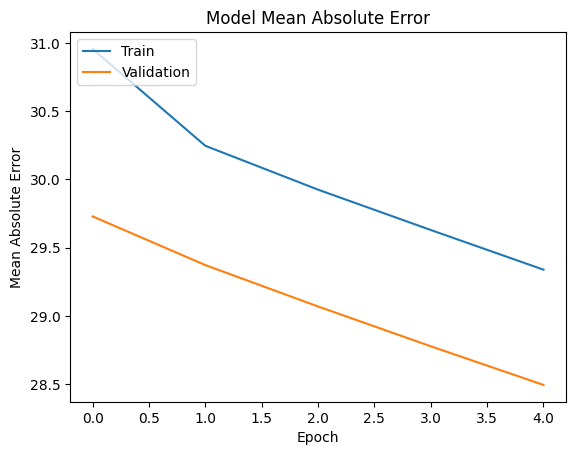

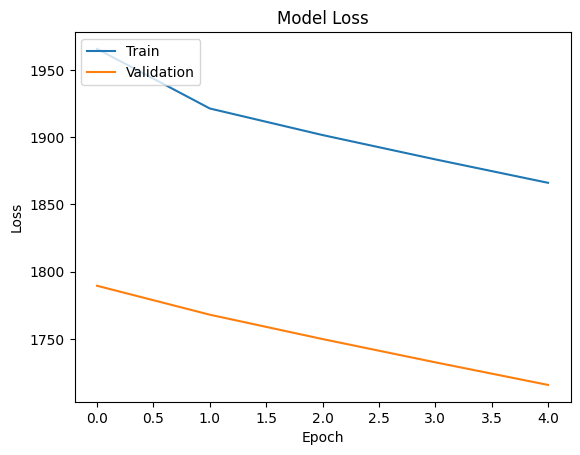

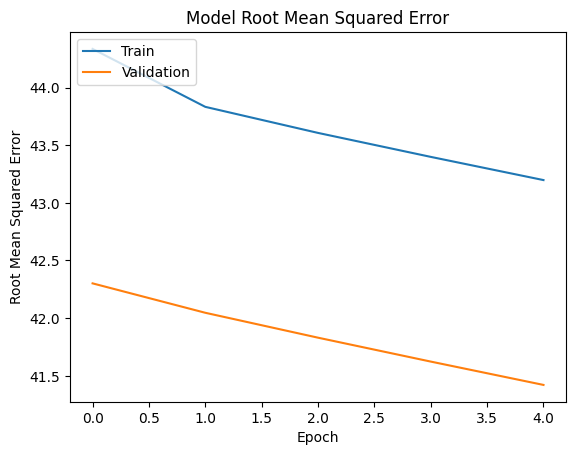

In [28]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Root Mean Squared Error')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Inference

In [29]:
new_texts = '''DAKWAAN. - Bahwa ia Terdakwa LUTFI BIN FADLAN pada hari Kamis tanggal 05 September 2019 Pukul 03.30 WITA atau setidak-tidaknya pada suatu waktu dalam bulan September 2019 atau setidak-tidaknya suatu waktu pada tahun 2019, bertempat di Banjar Dinas Dukuh, Desa Talibeng, Kec. Sidemen, Kab. Karangasem atau setidak-tidaknya di suatu tempat yang termasuk dalam daerah hukum Pengadilan Negeri Amlapura yang berwenang memutus dan mengadili, dengan sengaja mengambil sesuatu barang yang seluruhnya atau sebagian kepunyaan orang lain dengan maksud dimilikinya secara melawan hukum pada waktu malam, dalam suatu pekarangan tertutup yang ada rumahnya, yang dilakukan oleh orang yang ada disitu tidak diketahui atau tidak dikehendaki oleh yang berhak, dan untuk sampai pada barang yang diambil, dilakukan dengan memanjat yang dilakukan Terdakwa dengan cara cara sebagai berikut -. Berawal pada hari Kamis tanggal 05 September 2019 Pukul 03.30 WITA, Terdakwa berangkat dari kos terdakwa di Daerah Kamasan Klungkung menggunakan motor Shougun berwarna biru tanpa plat nomor menuju Br. Dinas Dukuh, Desa Talibeng untuk mengambil burung di rumah I MADE ARTANA.. Bahwa kemudian terdakwa memarkir kendaraan dipinggir jalan, dan selanjutnya menuju teras pekarangan rumah saksi I MADE ARTANA, terdakwa berjalan melalui sungai hingga sampai disebelah utara rumah saksi I MADE ARTANA, dengan bantuan kayu sebagai penyangga kaki untuk bertumpu terdakwa memanjat tembok yang tingginya kurang lebih 3 (tiga) meter di sebelah utara dan memasuki pekarangan rumah saksi I MADE ARTANA. Setelah itu terdakwa berjalan menuju tempat digantungnya burung, kemudian dengan menggunakan kedua tangan terdakwa langsung mengambil burung tersebut dari sangkarnya. Namun pada saat mengambilnya terdakwa mendengar teriakan, sehingga terdakwa langsung berlari ke arah tembok tempat sebelumnya terdakwa memanjat, kemudian langsung melompat dan pergi ke arah selatan memutar di belakang rumah I MADE ARTANA. Bahwa terdakwa telah mengetahui sebelumnya burung tersebut adalah burung berjenis kepodang dengan bulu dada berwarna kuning, sayap berwarna hitam dan paruh berwarna merah muda milik I MADE ARTANA. Terdakwa mengetahuinya karena terdakwa adalah pedagang bakso keliling yang sering melewati rumah saksi I MADE ARTANA. Dan saksi I MADE ARTANA adalah pelanggan terdakwa.. Bahwa pada hari kamis tanggal 05 September 2019, sekira pukul 08.00 wita terdakwa LUTFI BIN FADLAN datang ke Toko milik saksi SUMADI dan ARIFATUL HASANAH yang merupakan pasangan suami istri, dan memiliki usaha penjual burung, maupun pakan burung dan alat-alat yang berkaitan dengan dunia penghobby burung untuk menjual seekor burung berjenis kepodang. Saat itu saksi SUMARDI menerimanya namun tidak langsung membayarnya. Saksi mengatakan akan melihat perkembangannya dahulu sebelum membeli. Menjelang siang, terdakwa LUTFI BIN FADLAN kembali datang untuk meminta bayaran, kemudian saksi SUMARDI saat itu membayar sebesar Rp. 600.000,- (enam ratus ribu rupiah) untuk seekor burung jenis kepodang tersebut.. Bahwa pada suatu waktu yang saksi I MADE ARTANA tidak ingat, saat hendak pergi ke pasar Galiran Klungkung untuk menjual hasil kebun jenis cabai, setelah menjual hasil kebunnya, saksi mendatangi tempat yang menjual burung yang berada di jalan Rama, Klungkung, dan melihat burung jenis kepodang yang tergantung mirip seperti burung milik saksi, dan pada saat melihat burung berjenis Kepodang tersebut saksi merasa bahwa burung tersebut adalah milik saksi dengan ciri saat saksi datang burung tersebut langsung berbunyi, kemudian saksi menanyakan harga burung tersebut namun penjual mengatakan belum menjualnya. Beberapa saat kemudian, saksi I MADE ARTANA bersama pihak kepolisian mendatangi Toko saksi SUMARDI dan saksi ARIFATUL HASANAH dan mengatakan bahwa burung kepodang itu adalah milik saksi I MADE ARTANA. Dengan tingkah laku burung yang gacor saat dipanggil saksi I MADE ARTANA, sehingga saksi SUMARDI dan saksi ARIFATUL HASANAH yakin bahwa burung tersebut adalah burung milik I MADE ARTANA.. Bahwa atas pencurian tersebut saksi I MADE ARTANA mengalami kerugian kurang lebih Rp.1.500.000,- (satu juta lima ratus ribu rupiah). 
-Perbuatan Terdakwa sebagaimana diatur dan diancam pidana dalam Pasal 363 ayat (1) ke-3 dan ke-5 KUHP. -'''
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = tf.keras.preprocessing.sequence.pad_sequences(new_sequences, maxlen=max_len, padding='post')

predictions = model.predict(new_X)

print(f'Predicted Putusan: {predictions[0]}')

134/134 [==============================] - 26s 192ms/step
Predicted Putusan: [2.786024]
